# Calculating Correlation Using Pandas DataFrames

## 1. Import Libraries and Dependencies

In [12]:
# Import libraries and dependencies
import pandas as pd
from pathlib import Path
import seaborn as sns
%matplotlib inline

## 2. Create a Path to the File Using Pathlib.

In [13]:
# Set the file paths to the CSVs using the Path class from the pathlib library
msft_csv_path = Path("../Resources/MSFT.csv")
sp500_csv_path = Path("../Resources/SP500.csv")


## 3. Read the CSV into a Pandas DataFrame.

In [14]:
# Read the data, set the `date` as the index
msft_df = pd.read_csv(msft_csv_path, index_col="date", infer_datetime_format=True, parse_dates=True)
sp500_df = pd.read_csv(sp500_csv_path, index_col="date", infer_datetime_format=True, parse_dates=True)

sp500_df.head()

,close
date,
2014-05-20,1872.829956
2014-05-21,1888.030029
2014-05-22,1892.489990
2014-05-23,1900.530029
2014-05-27,1911.910034


## 4. Combine the DataFrames

In [15]:
# Use the `concat` function to combine the two DataFrames 
combined_df = pd.concat([msft_df, sp500_df], axis="columns", join="inner")
combined_df

,close,volume,open,high,low,close
date,,,,,,
2014-05-20,39.68,21318920,39.680,39.94,39.4600,1872.829956
2014-05-21,40.35,22377460,39.800,40.35,39.7399,1888.030029
2014-05-22,40.10,20201010,40.290,40.35,39.8500,1892.489990
2014-05-23,40.12,18013300,40.370,40.37,40.0000,1900.530029
2014-05-27,40.19,26160450,40.260,40.26,39.8100,1911.910034
...,...,...,...,...,...,...
2019-05-13,123.35,33944920,124.110,125.55,123.0400,2811.870117
2019-05-14,124.73,25266320,123.870,125.88,123.7000,2834.409912
2019-05-15,126.02,24722710,124.260,126.71,123.7000,2850.959961


## 5. Drop Extra Columns

In [5]:
# Drop the extra columns from the DataFrame
combined_df.drop(columns=['open', 'high', 'low', 'volume'], inplace=True)
combined_df

,close,close
date,,
2014-05-20,39.68,1872.829956
2014-05-21,40.35,1888.030029
2014-05-22,40.10,1892.489990
2014-05-23,40.12,1900.530029
2014-05-27,40.19,1911.910034
...,...,...
2019-05-13,123.35,2811.870117
2019-05-14,124.73,2834.409912
2019-05-15,126.02,2850.959961


## 6. Rename Columns

In [6]:
# Rename the columns by modifying the columns DataFrame attribute
combined_df.columns = ['MSFT', 'SP500']
combined_df

,MSFT,SP500
date,,
2014-05-20,39.68,1872.829956
2014-05-21,40.35,1888.030029
2014-05-22,40.10,1892.489990
2014-05-23,40.12,1900.530029
2014-05-27,40.19,1911.910034
...,...,...
2019-05-13,123.35,2811.870117
2019-05-14,124.73,2834.409912
2019-05-15,126.02,2850.959961


## 7. Plot the Price Trends

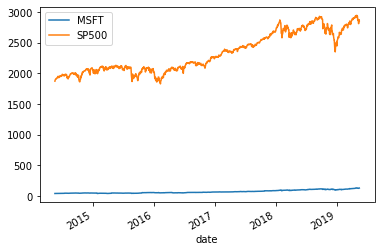

In [7]:
# Plot the data trends of the two variables over time
combined_df.plot()

## 8. Plot Price Relationships

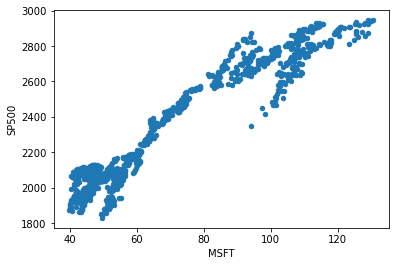

In [8]:
# Plot the relationship between the two variables
combined_df.plot(kind='scatter', x='MSFT', y='SP500')

## 9. Calculate Correlation of Prices

In [16]:
# Calculate the correlation of closing prices between MSFT and SP500
price_correlation = combined_df.corr()
price_correlation

,close,volume,open,high,low,close
close,1.000000,-0.126629,0.999339,0.999664,0.999721,0.960995
volume,-0.126629,1.000000,-0.123394,-0.116825,-0.133617,-0.193103
open,0.999339,-0.123394,1.000000,0.999741,0.999614,0.960226
high,0.999664,-0.116825,0.999741,1.000000,0.999541,0.959513
low,0.999721,-0.133617,0.999614,0.999541,1.000000,0.962020
close,0.960995,-0.193103,0.960226,0.959513,0.962020,1.000000


## 10. Correlation of Prices

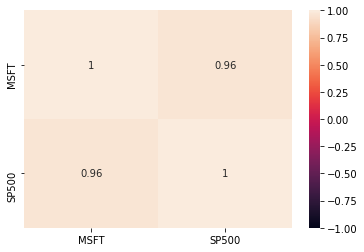

In [10]:
# Use the `heatmap` function from the seaborn library to visualize correlations
sns.heatmap(price_correlation, vmin=-1, vmax=1, annot = True)

In [11]:
# Calculate the correlation between each column
price_correlation

,MSFT,SP500
MSFT,1.000000,0.960995
SP500,0.960995,1.000000
